In [2]:
suppressPackageStartupMessages({library(coursekata)})

In [3]:
options(repr.plot.width=20, repr.plot.height=10) 

In [4]:
test_scores <- read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSTmJKcGUJ81NmJ14LjyOMsqa1pggocW33kDkx0MXAocONWQDbGgPXFCC6uSCefnPf_BwrEjaxN-kUA/pub?gid=0&single=true&output=csv")

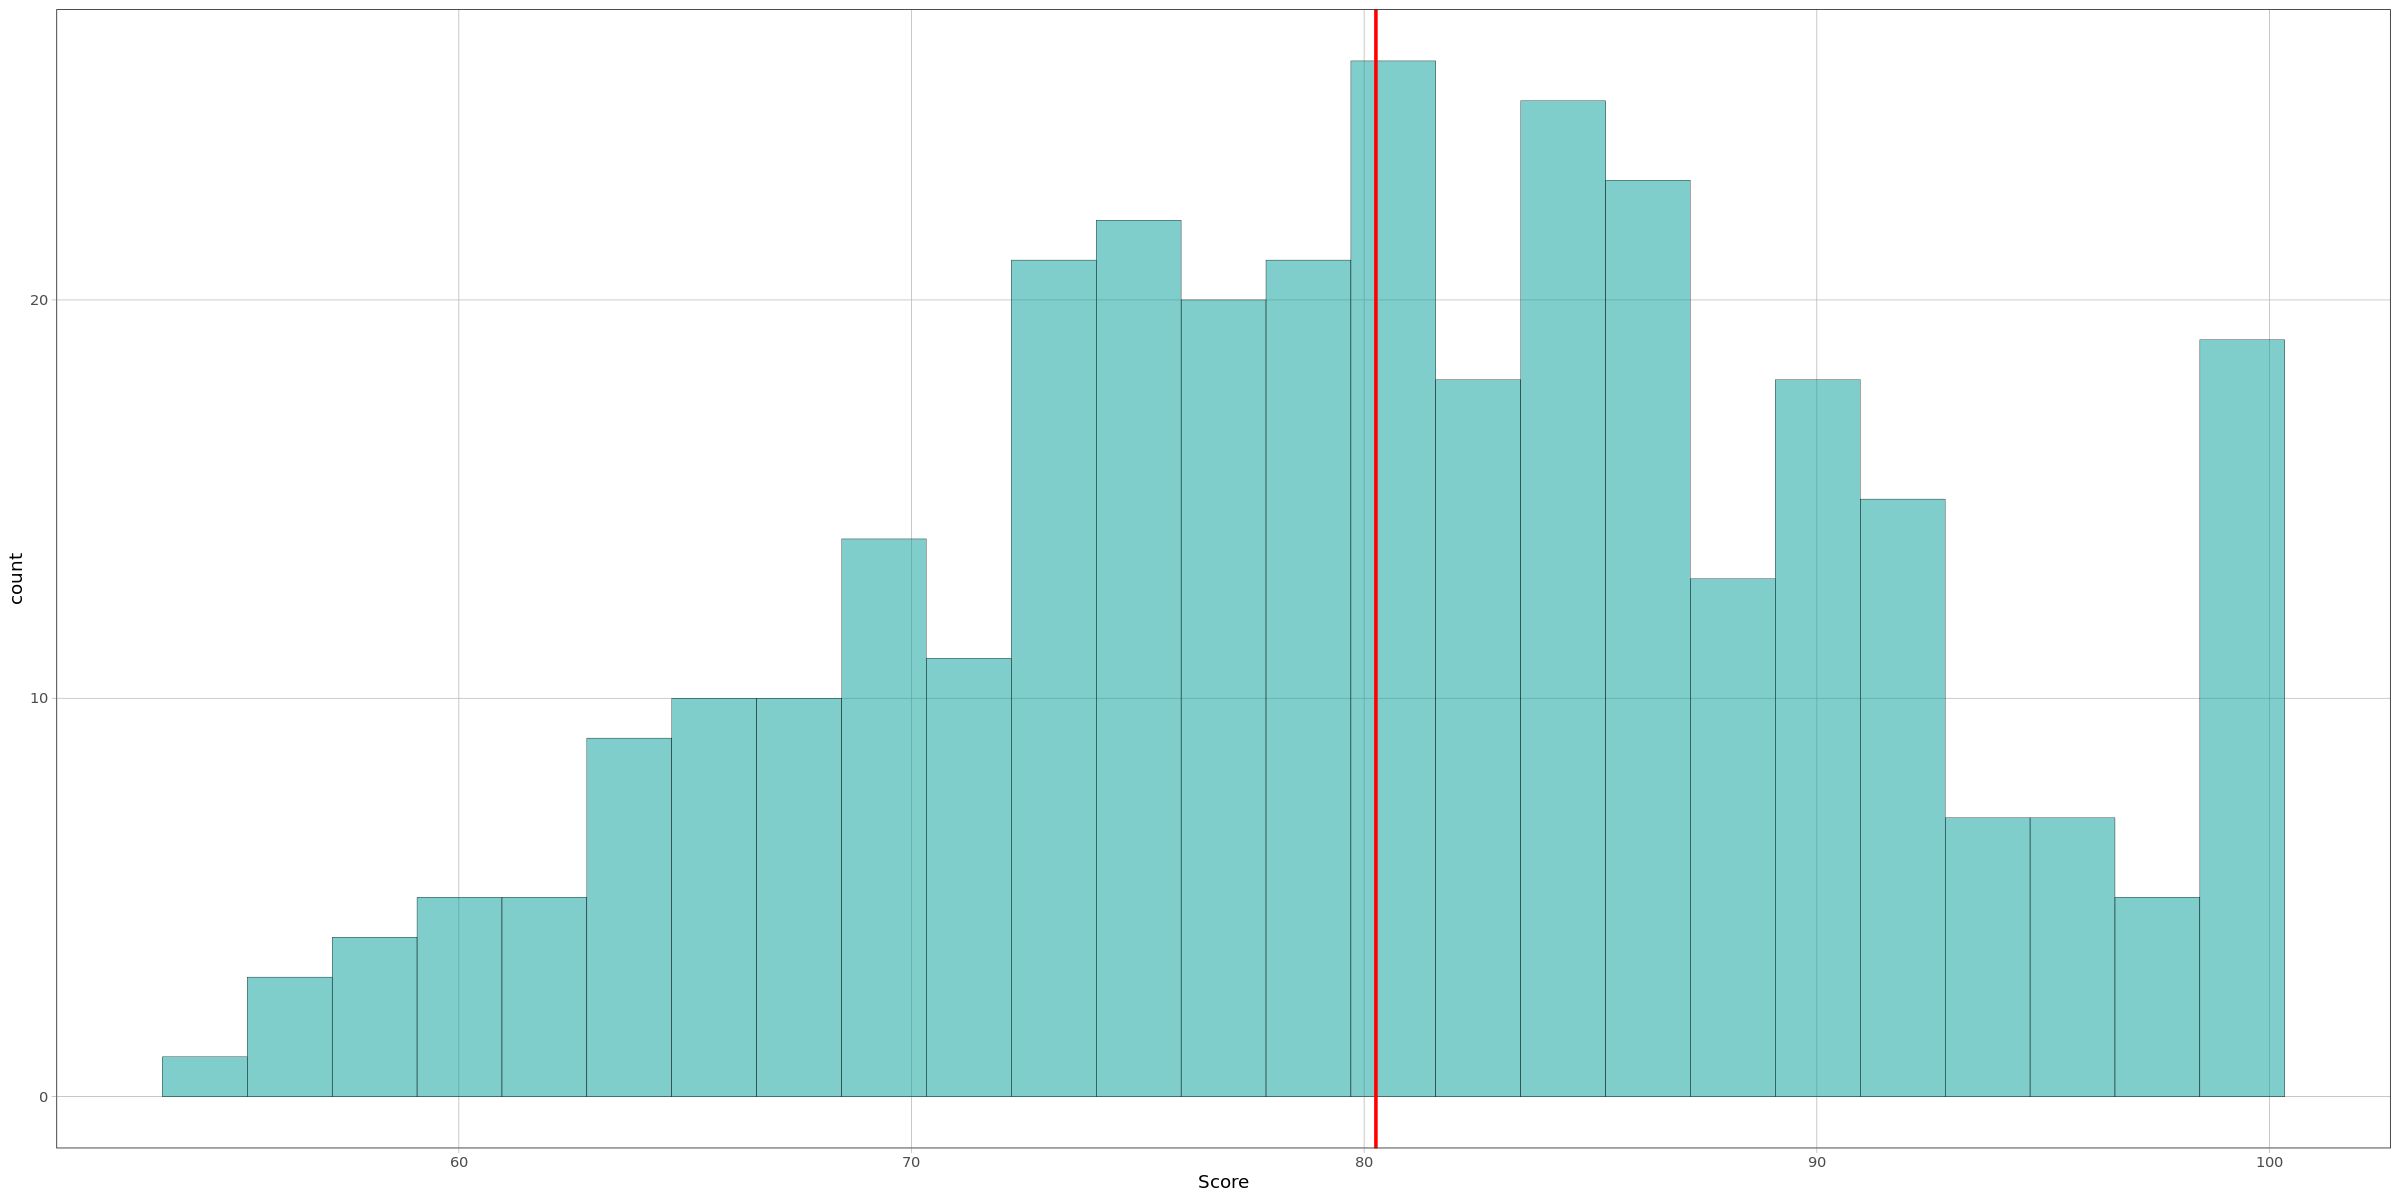

In [5]:
gf_histogram(~ Score, data=test_scores, width=0.2) %>% gf_model(Score ~ NULL, color='red')

In [6]:
true_mean <- mean(test_scores$Score)

X
 TRUE FALSE 
   95     5 

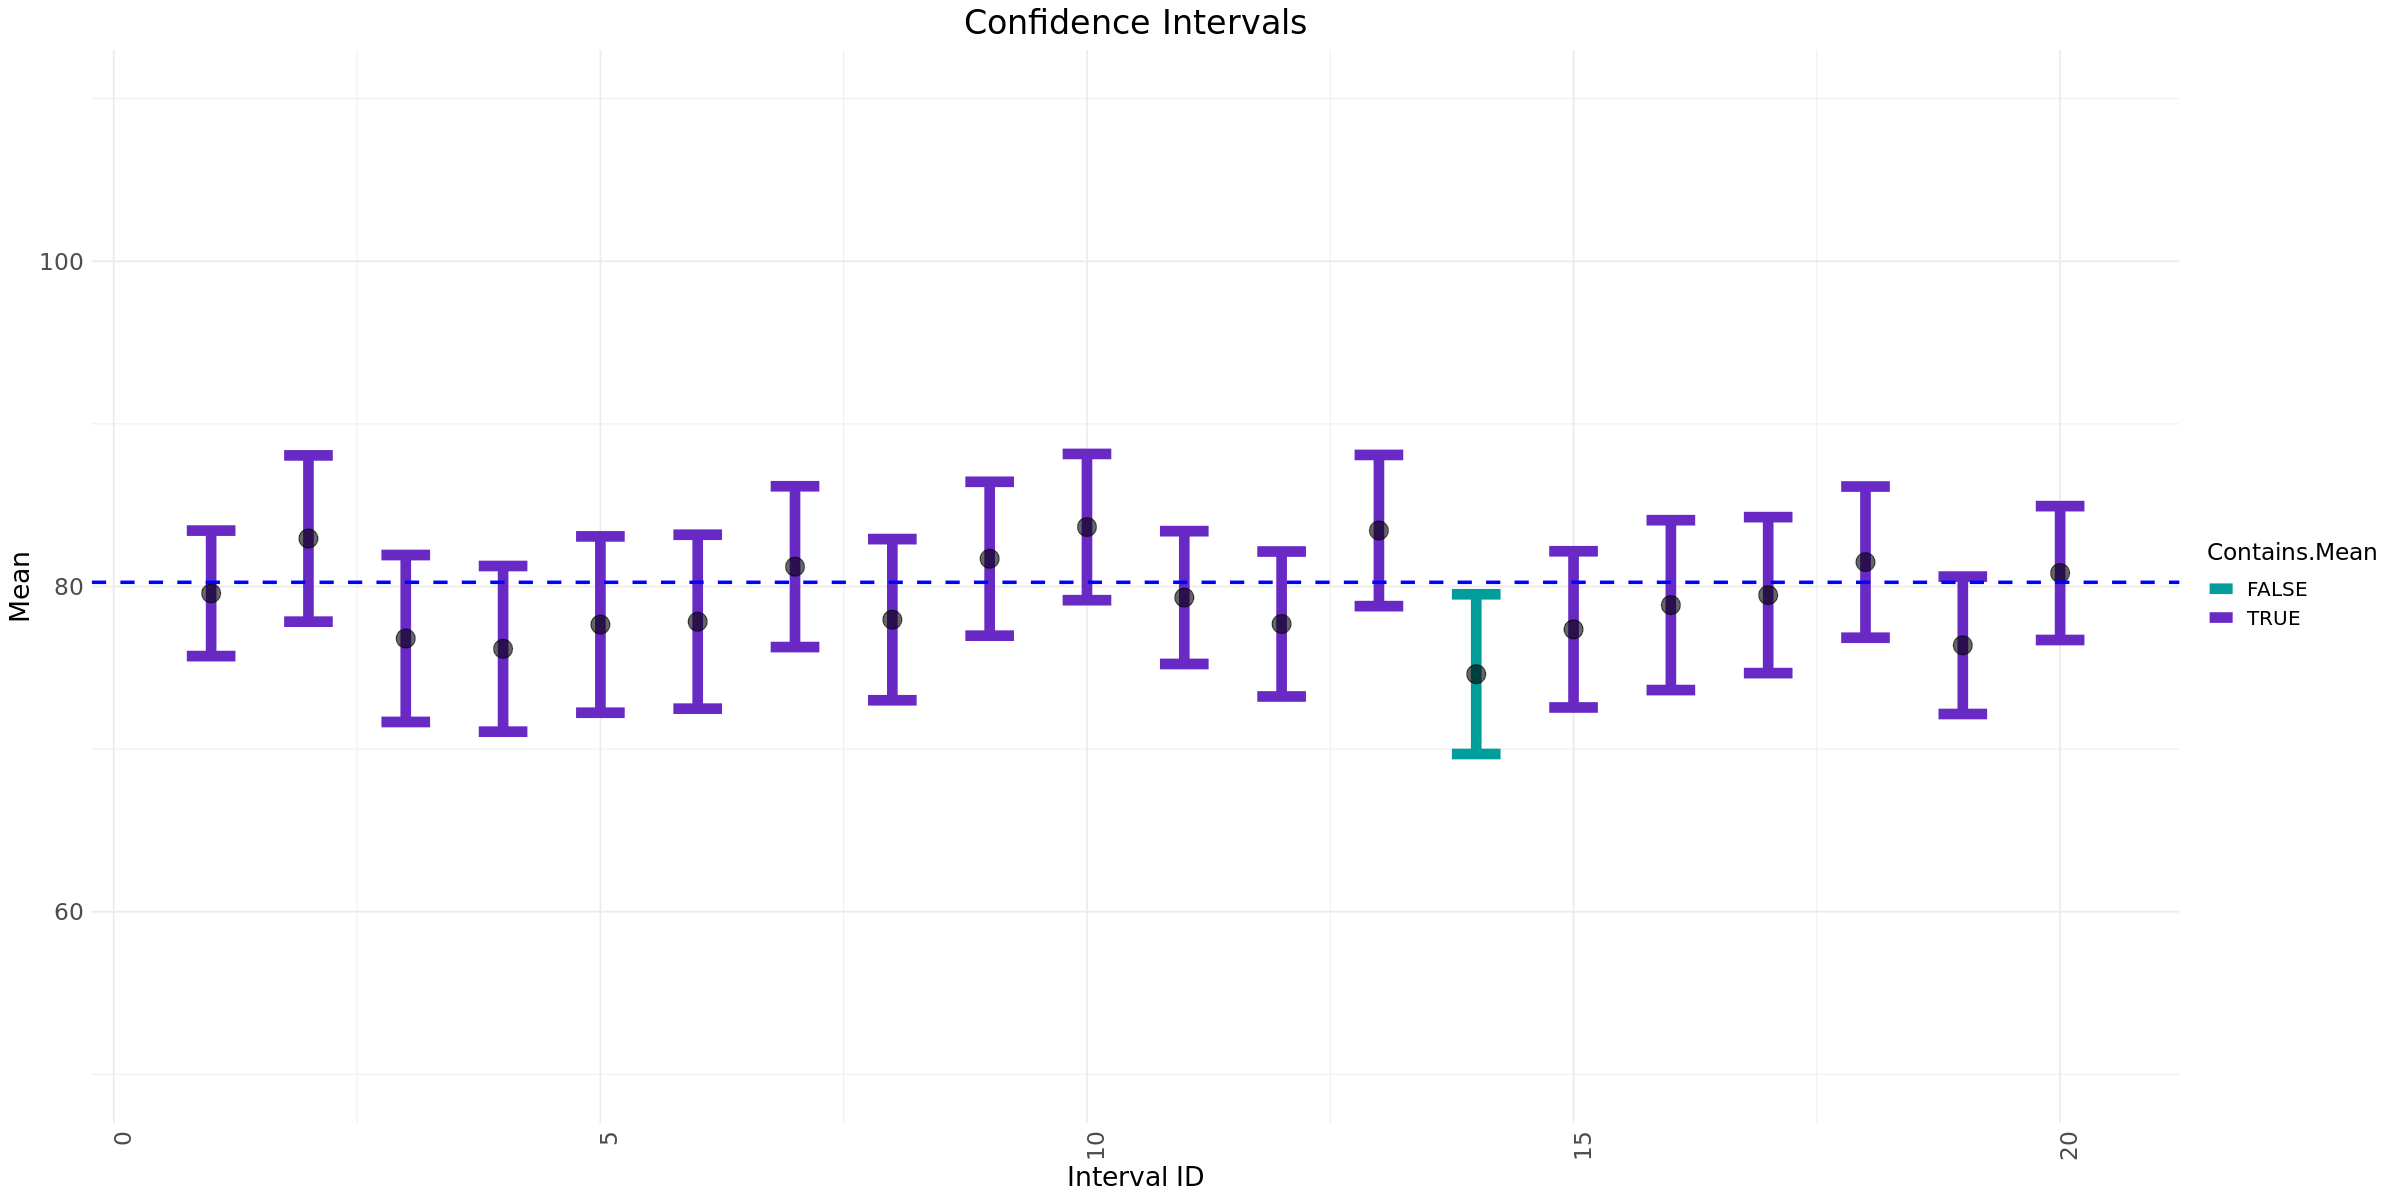

In [16]:
sample_size <- 20
number_of_confints <- 20

# Simulate a bunch of samples and calculate the confidence interval for the mean of each sample
confidence_intervals <- do(number_of_confints)*confint(lm(Score~ NULL,data=resample(test_scores,size=sample_size)))

# Calculate a column that indicates if the TRUE mean is contained in each confidence interval
confidence_intervals$Contains.Mean <- confidence_intervals$X2.5 < true_mean & true_mean < confidence_intervals$X97.5

# Calculate the mean of each sample by averaging the bounds of the confidence interval
confidence_intervals$Mean <- (confidence_intervals$X2.5 + confidence_intervals$X97.5)/2

# Label each sample with an ID
confidence_intervals$id <- seq_len(nrow(confidence_intervals))

# Rename the upper and lower bounds
confidence_intervals$lower <- confidence_intervals$X2.5
confidence_intervals$upper <- confidence_intervals$X97.5

# Calculate the proportion 
tally(confidence_intervals$Contains.Mean, format="percent")

# Visualize the confidence intervals with the true mean
ggplot(confidence_intervals, aes(x = id, y = Mean)) + 
  geom_errorbar(aes(ymin = lower, ymax = upper, color=Contains.Mean), width = 0.5, size=3) + 
  geom_point(size=5) +
  geom_hline(aes(yintercept = true_mean), color = "blue", linetype = "dashed") +
  theme_minimal() +
  ylim(50,110) +
  labs(x = "Interval ID", y = "Mean", title = "Confidence Intervals") +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, size = 14), # X axis text
    axis.text.y = element_text(size = 14), # Y axis text
    axis.title.x = element_text(size = 16), # X axis title
    axis.title.y = element_text(size = 16), # Y axis title
    plot.title = element_text(size = 20, hjust = 0.5), # Plot title
    legend.title = element_text(size = 14), # Legend title
    legend.text = element_text(size = 12) # Legend text
  )